In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Load data
data_A = np.genfromtxt('data/DetectorA.csv', delimiter=',', skip_header=1).T
data_B = np.genfromtxt('data/DetectorB.csv', delimiter=',', skip_header=1).T
data_C = np.genfromtxt('data/DetectorC.csv', delimiter=',', skip_header=1).T
data_Target = np.genfromtxt('data/DetectorTarget.csv', delimiter=',', skip_header=1).T

In [45]:
# Score
score_A = data_A[1]
score_B = data_B[1]
score_C = data_C[1]
score_Target = data_Target[1]

# Energy
energy_A = data_A[2]
energy_B = data_B[2]
energy_C = data_C[2]
energy_Target = data_Target[2]


In [46]:
# Set limits
energy_upper_limit = 3500
energy_lower_limit = 1000

score_A = score_A[energy_A < energy_upper_limit]
score_B = score_B[energy_B < energy_upper_limit]
score_C = score_C[energy_C < energy_upper_limit]
score_Target = score_Target[energy_Target < energy_upper_limit]

energy_A = energy_A[energy_A < energy_upper_limit]
energy_B = energy_B[energy_B < energy_upper_limit]
energy_C = energy_C[energy_C < energy_upper_limit]
energy_Target = energy_Target[energy_Target < energy_upper_limit]

Text(0, 0.5, 'Counts')

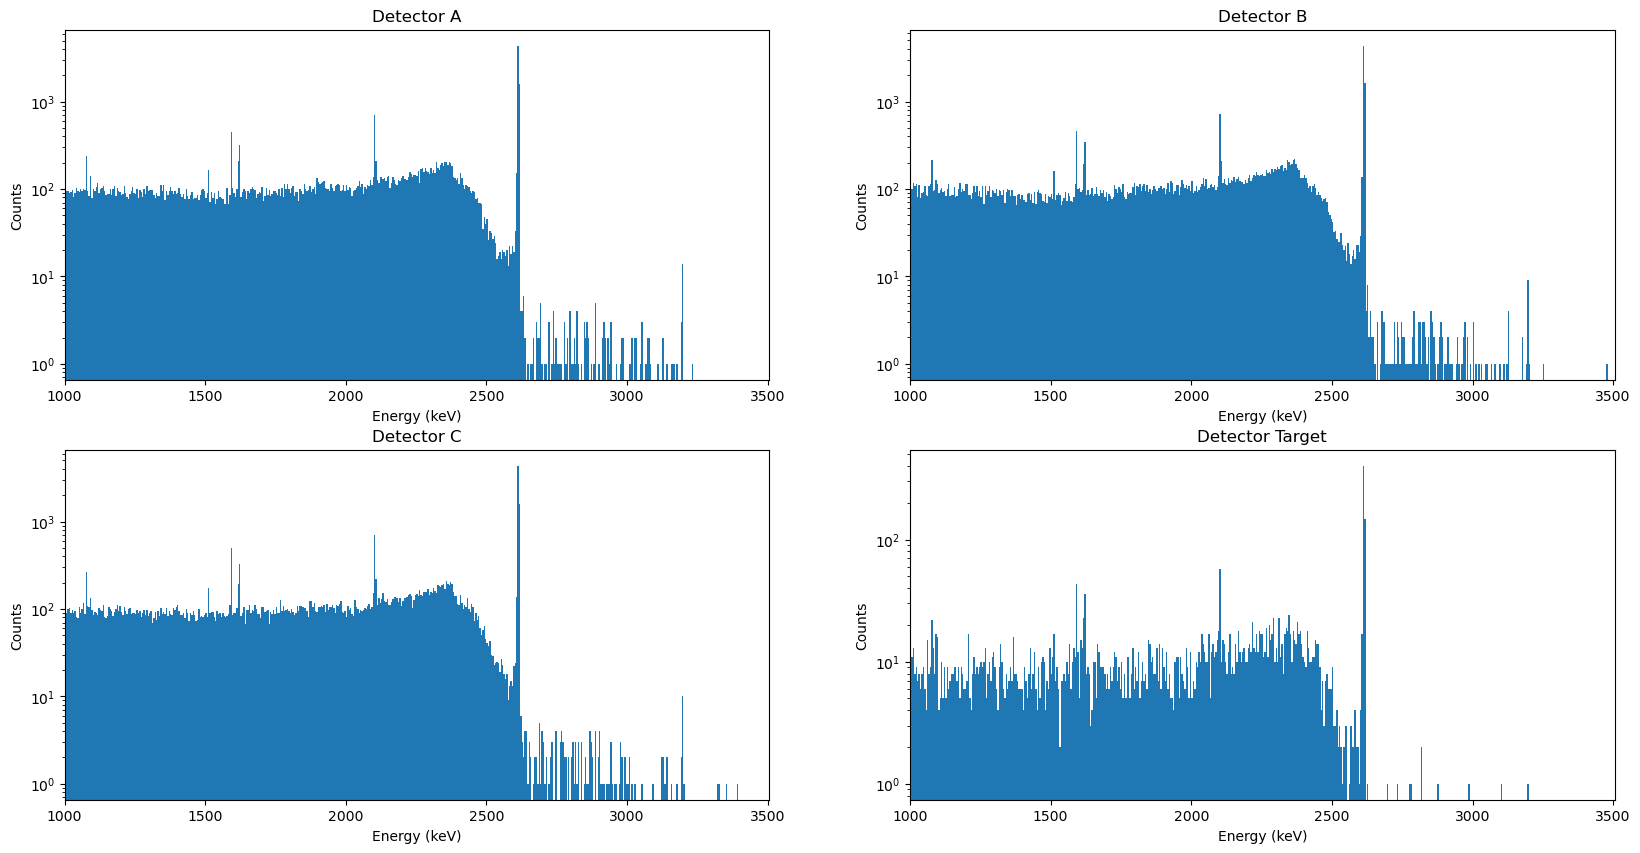

In [47]:
# Create histograms
bin_width = 5
hist_A, bins_A = np.histogram(energy_A, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
hist_B, bins_B = np.histogram(energy_B, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
hist_C, bins_C = np.histogram(energy_C, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
hist_Target, bins_Target = np.histogram(energy_Target, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].set_title('Detector A')
axes[0, 0].stairs(hist_A, bins_A, label='Detector A', fill=True)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(energy_lower_limit, energy_upper_limit + bin_width)
axes[0, 0].set_xlabel('Energy (keV)')
axes[0, 0].set_ylabel('Counts')

axes[0, 1].set_title('Detector B')
axes[0, 1].stairs(hist_B, bins_B, label='Detector B', fill=True)
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlim(energy_lower_limit, energy_upper_limit + bin_width)
axes[0, 1].set_xlabel('Energy (keV)')
axes[0, 1].set_ylabel('Counts')

axes[1, 0].set_title('Detector C')
axes[1, 0].stairs(hist_C, bins_C, label='Detector C', fill=True)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(energy_lower_limit, energy_upper_limit + bin_width)
axes[1, 0].set_xlabel('Energy (keV)')
axes[1, 0].set_ylabel('Counts')

axes[1, 1].set_title('Detector Target')
axes[1, 1].stairs(hist_Target, bins_Target, label='Detector Target', fill=True)
axes[1, 1].set_yscale('log')
axes[1, 1].set_xlim(energy_lower_limit, energy_upper_limit + bin_width)
axes[1, 1].set_xlabel('Energy (keV)')
axes[1, 1].set_ylabel('Counts')


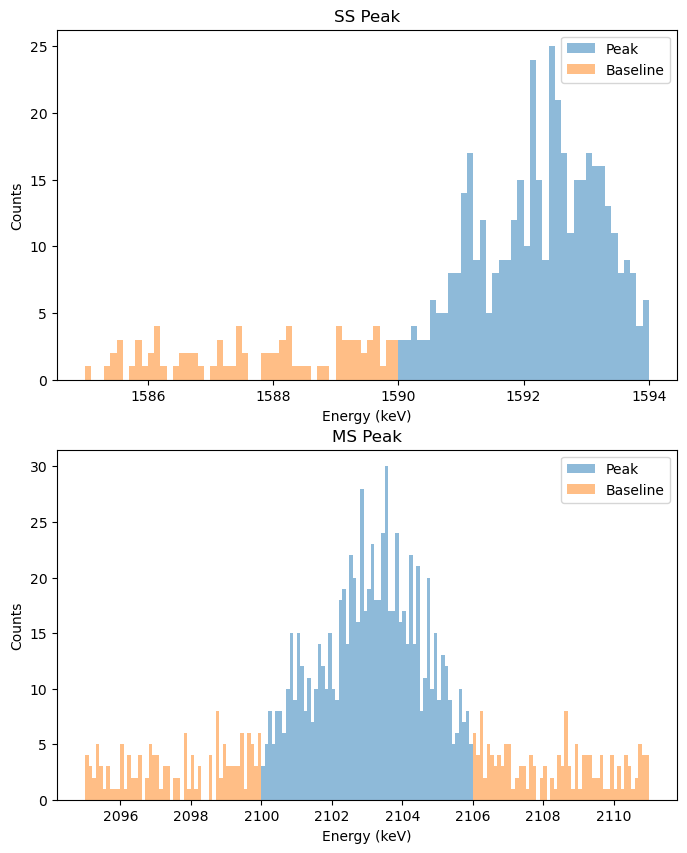

In [48]:
# Range of SS peak
ss_lower_limit = 1590
ss_upper_limit = 1594

# Range of MS peak
ms_lower_limit = 2100
ms_upper_limit = 2106

# Range of SS baseline
ss_baseline_lower_limit = 1585

# Range of MS baseline
ms_baseline_lower_limit = 2095
ms_baseline_upper_limit = 2111

ss = energy_A[(energy_A > ss_lower_limit) & (energy_A < ss_upper_limit)]
ms = energy_B[(energy_B > ms_lower_limit) & (energy_B < ms_upper_limit)]

ss_baseline = energy_A[(energy_A > ss_baseline_lower_limit) & (energy_A < ss_lower_limit)]
ms_baseline = energy_B[((energy_B > ms_baseline_lower_limit) & (energy_B < ms_lower_limit)) | ((energy_B > ms_upper_limit) & (energy_B < ms_baseline_upper_limit))]

bin_width_peaks = 0.1

fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes[0].set_title('SS Peak')
_ = axes[0].hist(ss, bins=np.arange(ss_lower_limit, ss_upper_limit + bin_width_peaks, bin_width_peaks), alpha=0.5, label='Peak')
_ = axes[0].hist(ss_baseline, bins=np.arange(ss_baseline_lower_limit, ss_lower_limit + bin_width_peaks, bin_width_peaks), alpha=0.5, label='Baseline')
axes[0].set_xlabel('Energy (keV)')
axes[0].set_ylabel('Counts')
axes[0].legend()

axes[1].set_title('MS Peak')
_ = axes[1].hist(ms, bins=np.arange(ms_lower_limit, ms_upper_limit + bin_width_peaks, bin_width_peaks), alpha=0.5, label='Peak')
_ = axes[1].hist(ms_baseline, bins=np.arange(ms_baseline_lower_limit, ms_baseline_upper_limit + bin_width_peaks, bin_width_peaks), alpha=0.5, label='Baseline')
axes[1].set_xlabel('Energy (keV)')
axes[1].set_ylabel('Counts')
axes[1].legend()

In [49]:
ss_score = score_A[(energy_A > ss_lower_limit) & (energy_A < ss_upper_limit)]
ms_score = score_B[(energy_B > ms_lower_limit) & (energy_B < ms_upper_limit)]

ss_baseline_score = score_A[(energy_A > ss_baseline_lower_limit) & (energy_A < ss_lower_limit)]
ms_baseline_score = score_B[((energy_B > ms_baseline_lower_limit) & (energy_B < ms_lower_limit)) | ((energy_B > ms_upper_limit) & (energy_B < ms_baseline_upper_limit))]

Ns = ss.size
Bs = ss_baseline.size
Nb = ms.size
Bb = ms_baseline.size

# Return TPR, FPR
def metrics(threshold, tau_ss=0.8, tau_ms=0.6):
    Ntp = np.sum(ss_score > threshold)
    Bss = np.sum(ss_baseline_score > threshold)
    Nfp = np.sum(ms_score > threshold)
    Bms = np.sum(ms_baseline_score > threshold)
    return (Ntp - tau_ss * Bss) / (Ns - tau_ss * Bs), (Nfp - tau_ms * Bms) / (Nb - tau_ms * Bb)

# Try n thresholds
def roc(n=200):
    return np.array([metrics(t) for t in np.linspace(0, 1, n)])

# Plot ROC curve
def plot_roc(threshold):
    roc_curve = roc()
    selected = metrics(threshold)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(roc_curve[:, 1], roc_curve[:, 0], label='ROC curve')
    ax.plot(selected[1], selected[0], 'ro', label='Selected threshold')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')
    print(f'Selected threshold: {threshold:.3f}')
    print(f'True positive rate: {selected[0]:.2f}')
    print(f'False positive rate: {selected[1]:.2f}')
    plt.legend(loc='lower right')

In [50]:
import ipywidgets as widgets

widgets.interact(plot_roc, 
         threshold=widgets.FloatSlider(min=0, max=1, step=0.005, value=0.5, layout=widgets.Layout(width='50%')))

interactive(children=(FloatSlider(value=0.5, description='threshold', layout=Layout(width='50%'), max=1.0, ste…

<function __main__.plot_roc(threshold)>

In [51]:
# Final selection
selected_threshold = 0.085

selected_energy_A = energy_A[score_A > selected_threshold]
selected_energy_B = energy_B[score_B > selected_threshold]
selected_energy_C = energy_C[score_C > selected_threshold]
selected_energy_Target = energy_Target[score_Target > selected_threshold]

selected_hist_A, selected_bins_A = np.histogram(selected_energy_A, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
selected_hist_B, selected_bins_B = np.histogram(selected_energy_B, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
selected_hist_C, selected_bins_C = np.histogram(selected_energy_C, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))
selected_hist_Target, selected_bins_Target = np.histogram(selected_energy_Target, bins=np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width))

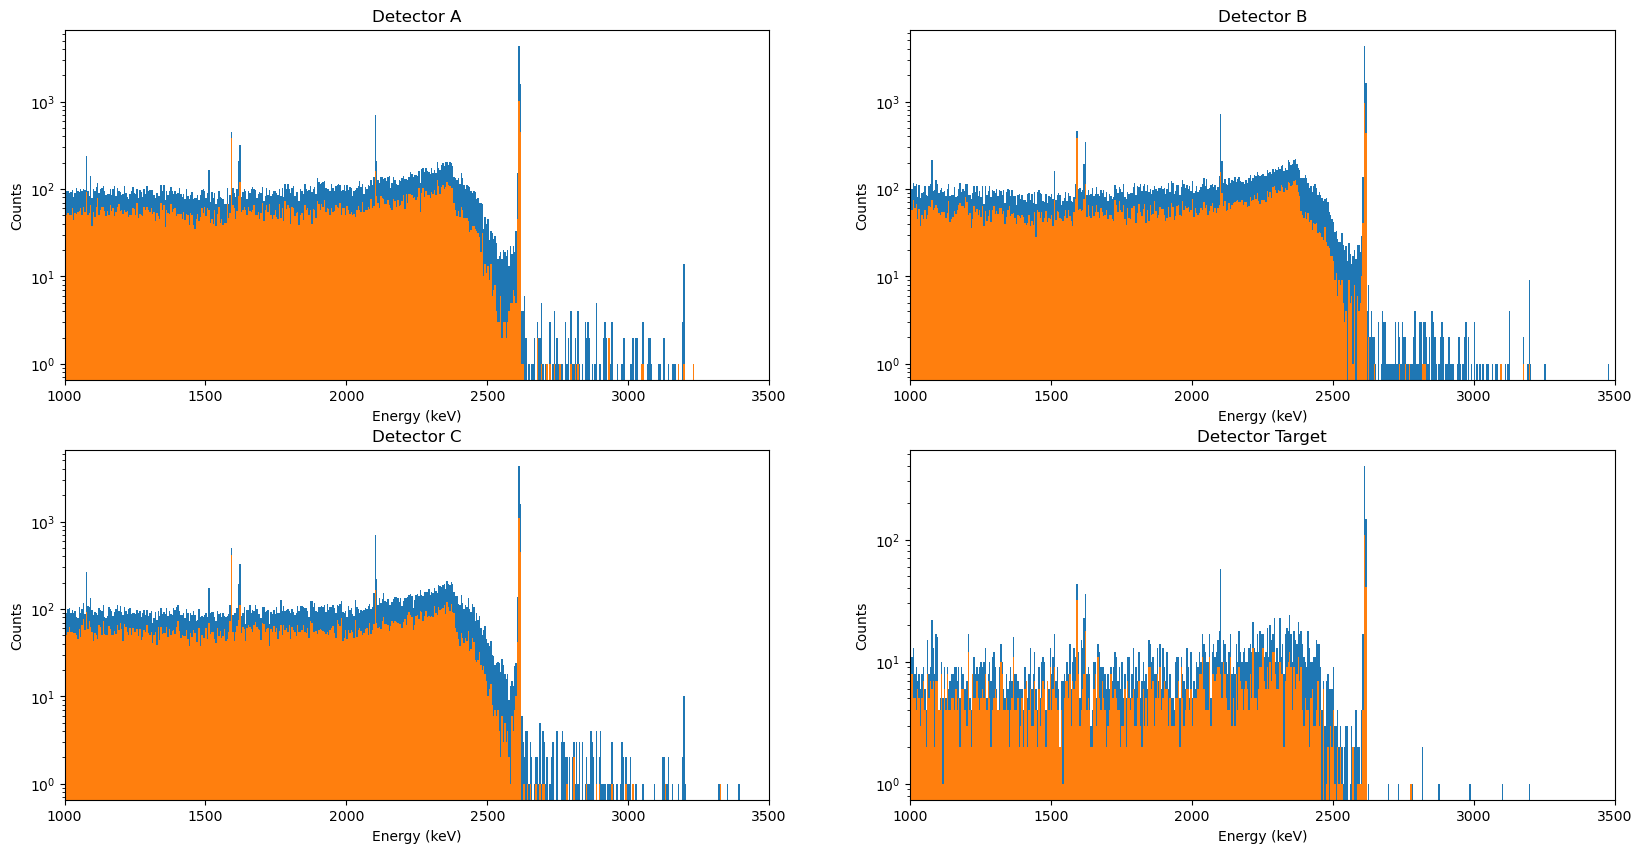

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].set_title('Detector A')
axes[0, 0].stairs(hist_A, bins_A, label='Original', fill=True)
axes[0, 0].stairs(selected_hist_A, selected_bins_A, label='Selected', fill=True)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(energy_lower_limit, energy_upper_limit)
axes[0, 0].set_xlabel('Energy (keV)')
axes[0, 0].set_ylabel('Counts')

axes[0, 1].set_title('Detector B')
axes[0, 1].stairs(hist_B, bins_B, label='Original', fill=True)
axes[0, 1].stairs(selected_hist_B, selected_bins_B, label='Selected', fill=True)
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlim(energy_lower_limit, energy_upper_limit)
axes[0, 1].set_xlabel('Energy (keV)')
axes[0, 1].set_ylabel('Counts')

axes[1, 0].set_title('Detector C')
axes[1, 0].stairs(hist_C, bins_C, label='Original', fill=True)
axes[1, 0].stairs(selected_hist_C, selected_bins_C, label='Selected', fill=True)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(energy_lower_limit, energy_upper_limit)
axes[1, 0].set_xlabel('Energy (keV)')
axes[1, 0].set_ylabel('Counts')

axes[1, 1].set_title('Detector Target')
axes[1, 1].stairs(hist_Target, bins_Target, label='Original', fill=True)
axes[1, 1].stairs(selected_hist_Target, selected_bins_Target, label='Selected', fill=True)
axes[1, 1].set_yscale('log')
axes[1, 1].set_xlim(energy_lower_limit, energy_upper_limit)
axes[1, 1].set_xlabel('Energy (keV)')
axes[1, 1].set_ylabel('Counts')

plt.show()


In [53]:
from scipy.integrate import quad

# Gaussian function
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Generate NLDBD PDF
mu = 2039
sigma = 1
bins_N = np.arange(energy_lower_limit, energy_upper_limit + bin_width, bin_width)
pdf_N = np.array([quad(gaussian, bins_N[i], bins_N[i+1], args=(mu, sigma))[0] for i in range(len(bins_N)-1)])

In [54]:
sum(pdf_N)

np.float64(1.0)

In [55]:
# Normalize histograms to get PDFs
pdf_A = selected_hist_A / np.sum(selected_hist_A)
pdf_B = selected_hist_B / np.sum(selected_hist_B)
pdf_C = selected_hist_C / np.sum(selected_hist_C)

In [56]:
sum(pdf_A), sum(pdf_B), sum(pdf_C)

(np.float64(1.0),
 np.float64(0.9999999999999993),
 np.float64(1.0000000000000004))

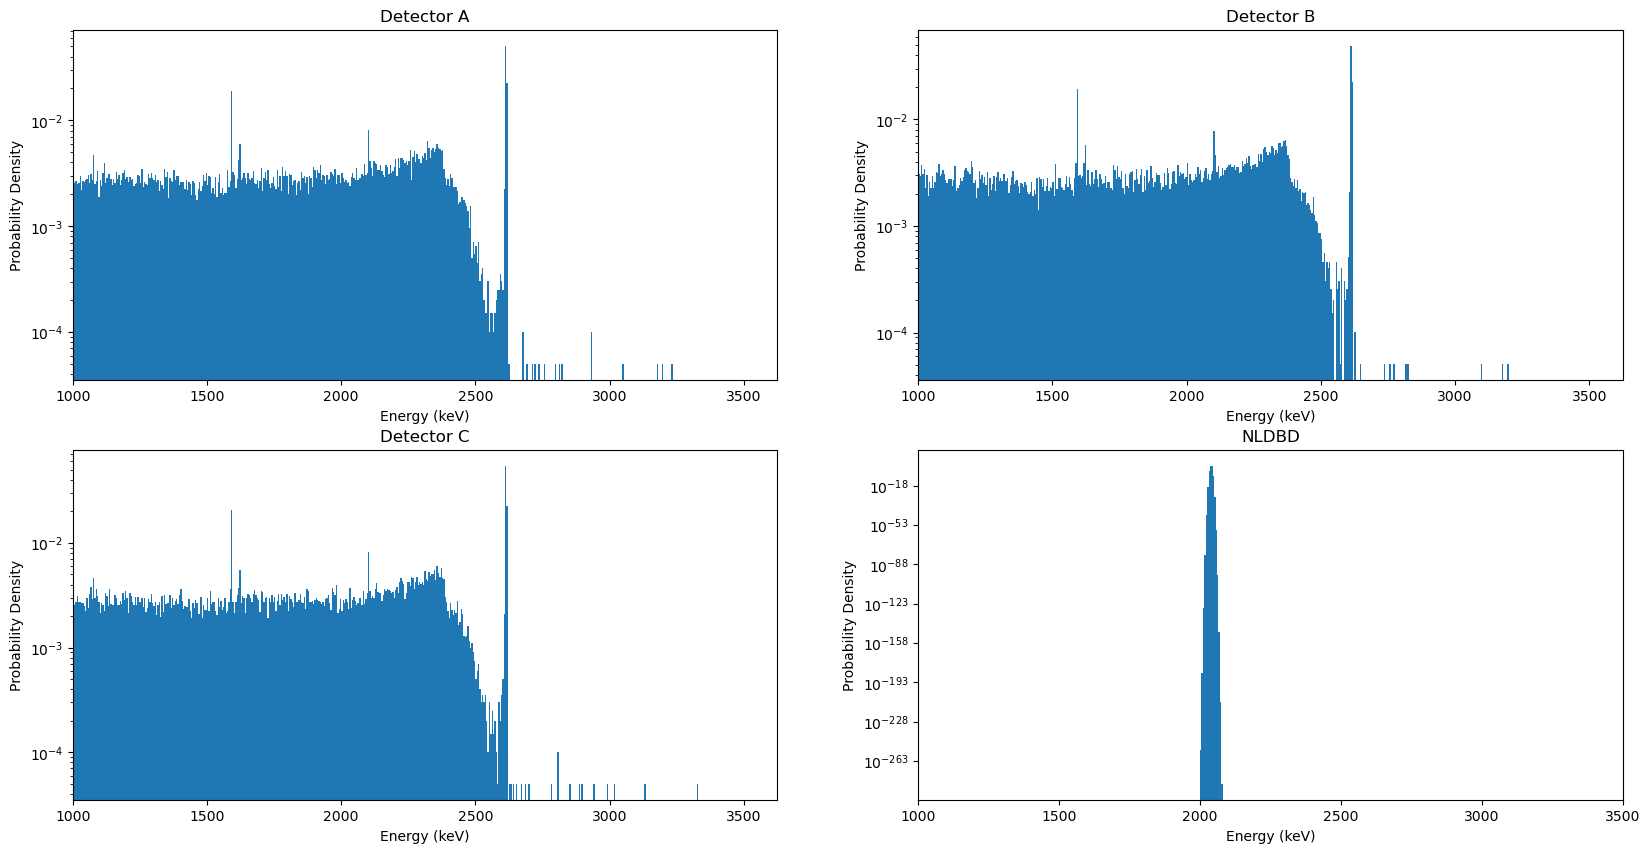

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].set_title('Detector A')
axes[0, 0].stairs(pdf_A, bins_A, label='Detector A', fill=True)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(1000)
axes[0, 0].set_xlabel('Energy (keV)')
axes[0, 0].set_ylabel('Probability Density')

axes[0, 1].set_title('Detector B')
axes[0, 1].stairs(pdf_B, bins_B, label='Detector B', fill=True)
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlim(1000)
axes[0, 1].set_xlabel('Energy (keV)')
axes[0, 1].set_ylabel('Probability Density')

axes[1, 0].set_title('Detector C')
axes[1, 0].stairs(pdf_C, bins_C, label='Detector C', fill=True)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(1000)
axes[1, 0].set_xlabel('Energy (keV)')
axes[1, 0].set_ylabel('Probability Density')

axes[1, 1].set_title('NLDBD')
axes[1, 1].stairs(pdf_N, bins_N, label='NLDBD', fill=True)
axes[1, 1].set_yscale('log')
axes[1, 1].set_xlim(1000, energy_upper_limit)
axes[1, 1].set_xlabel('Energy (keV)')
axes[1, 1].set_ylabel('Probability Density')

plt.show()

In [58]:
# theta = [theta_A, theta_B, theta_C, theta_N]
def hypothesis(theta):
    return theta[0] * pdf_A + theta[1] * pdf_B + theta[2] * pdf_C + theta[3] * pdf_N

def log_likelihood(theta, target_hist):
    mu = hypothesis(theta)
    non_zero_bins = target_hist[(target_hist > 0) & (mu > 0)]
    non_zero_bins_mu = mu[(target_hist > 0) & (mu > 0)]
    zero_bins_mu = mu[~(target_hist > 0) & ~(mu > 0)]
        
    return np.sum(non_zero_bins * np.log(non_zero_bins_mu) - non_zero_bins_mu - non_zero_bins * np.log(non_zero_bins) + non_zero_bins) - np.sum(zero_bins_mu)

def log_prior(theta):
    # Use Gaussian prior for theta_A and theta_B, Jeffreys prior for Poisson distribution for theta_C and theta_N
    prior = np.log(gaussian(theta[0], 1350, 100)) + np.log(gaussian(theta[1], 770, 270)) - np.log(theta[2]) / 2 - np.log(theta[3]) / 2
    return prior

def log_posterior(theta, target_hist):
    # Use the log-likelihood and log-prior to compute the log-posterior
    posterior = log_likelihood(theta, target_hist) + log_prior(theta)
    if np.any(theta < 0):
        return -np.inf
    return posterior

In [59]:
sum(selected_hist_Target)

np.int64(1838)

In [60]:
theta_min = 0
theta_max = 3000

In [61]:
from scipy.optimize import minimize

theta_initial = np.array([1350, 770, 1000, 10])
theta_est = minimize(lambda theta: -log_posterior(theta, selected_hist_Target), theta_initial, bounds=[(0, 3000), (0, 3000), (0, 3000), (0, 3000)]).x


C:\Users\hdhoa\AppData\Local\Temp\ipykernel_19612\3502814184.py:15: RuntimeWarning: divide by zero encountered in log
  prior = np.log(gaussian(theta[0], 1350, 100)) + np.log(gaussian(theta[1], 770, 270)) - np.log(theta[2]) / 2 - np.log(theta[3]) / 2


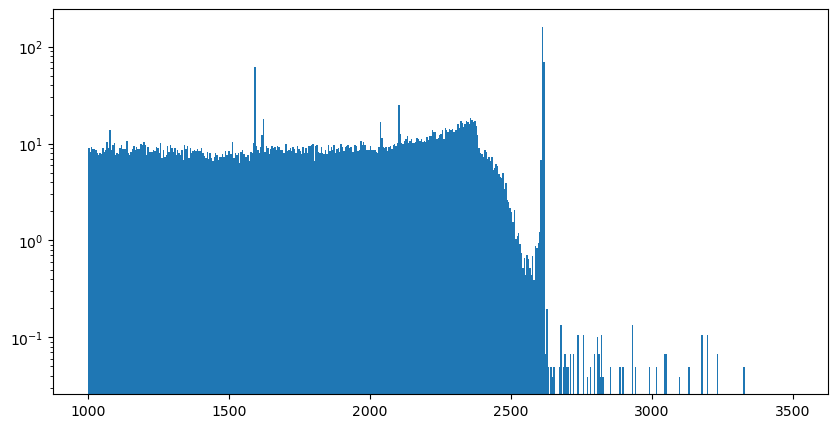

In [62]:
plt.figure(figsize=(10, 5))
plt.stairs(hypothesis(theta_est), bins_Target, label='Hypothesis', fill=True)
plt.yscale('log')

In [63]:
theta_est

array([1349.59254206,  769.59486022,  999.59447937,    9.57805702])

In [64]:
# result_hist = hypothesis(theta_est)
# plt.figure(figsize=(10, 5))
# plt.stairs(selected_hist_Target, bins_Target, label='Target', fill=True)
# plt.stairs(result_hist, bins_Target, label='Estimated', fill=True)
# plt.yscale('log')
# plt.xlim(energy_lower_limit, energy_upper_limit + bin_width)
# plt.legend()


In [65]:
import emcee

n_walkers = 100
initial_theta = theta_est + 0.1 * np.random.randn(n_walkers, len(theta_est))

sampler = emcee.EnsembleSampler(n_walkers, len(theta_est), log_posterior, args=[selected_hist_Target])

In [66]:
sampler.run_mcmc(initial_theta, 5000, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\hdhoa\AppData\Local\Temp\ipykernel_19612\3502814184.py:15: RuntimeWarning: invalid value encountered in log
  prior = np.log(gaussian(theta[0], 1350, 100)) + np.log(gaussian(theta[1], 770, 270)) - np.log(theta[2]) / 2 - np.log(theta[3]) / 2
100%|██████████| 5000/5000 [00:13<00:00, 375.39it/s]


State([[1.26512896e+03 5.89551456e+02 1.53221276e+01 8.14358134e+00]
 [1.30247635e+03 7.94592647e+01 4.32773906e+02 3.53106639e+00]
 [1.18172254e+03 3.73871756e+02 2.68400725e+02 9.19499917e+00]
 [1.17494998e+03 3.96180356e+02 2.82524387e+02 4.55863814e+00]
 [1.07351726e+03 5.99913850e+02 1.50596517e+02 7.33751343e-01]
 [1.45513439e+03 2.07898267e+02 1.84199525e+02 1.13014832e+01]
 [1.25558211e+03 3.60959123e+02 2.71386845e+02 7.58101114e-01]
 [1.15746843e+03 4.45072332e+02 3.03052168e+02 7.07508282e+00]
 [1.37902313e+03 2.47302931e+02 2.86115342e+02 2.31934784e+00]
 [1.35297970e+03 4.38362552e+02 1.16184054e+02 5.19090459e+00]
 [1.21918961e+03 4.67862728e+02 2.36960195e+02 1.65371177e+01]
 [1.19668587e+03 6.62779058e+02 1.66981464e+01 3.98379610e+00]
 [1.10781506e+03 6.63826045e+02 6.95332673e+01 1.37345067e-01]
 [1.22271375e+03 4.79212462e+02 8.23402989e+01 6.93162665e+00]
 [1.21842186e+03 2.53616970e+02 3.45141155e+02 5.26465576e+00]
 [1.28441222e+03 5.73668511e+02 3.97721235e+01 6.

Text(0.5, 0, 'step number')

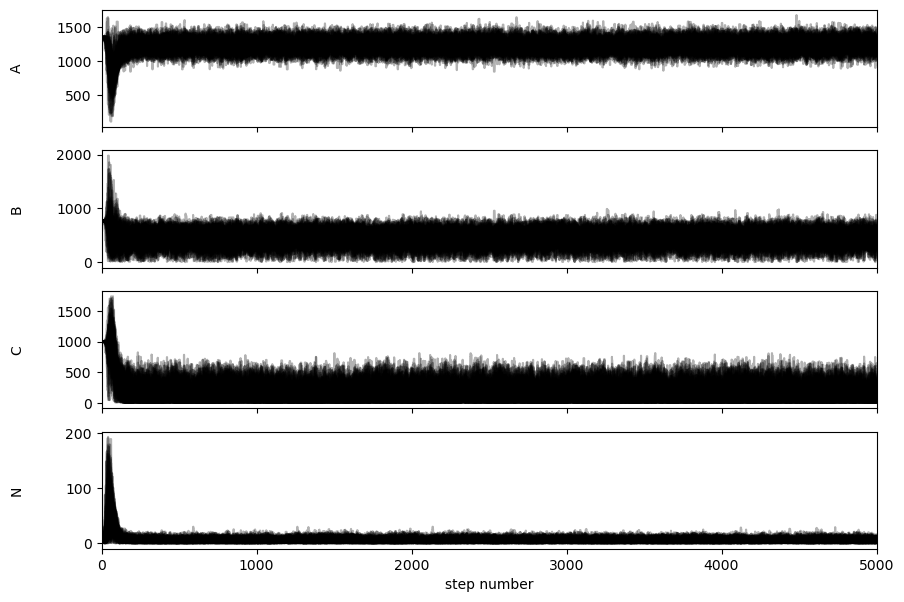

In [67]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["A", "B", "C", "N"]
for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [68]:
tau = sampler.get_autocorr_time()
print(tau)

[54.21197065 62.5172429  87.95709523 68.07660364]


In [69]:
flat_samples = sampler.get_chain(discard=200, flat=True)
print(flat_samples.shape)

(480000, 4)


In [70]:
from IPython.display import display, Math

result = []
for i in range(4):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    result.append(mcmc[1])
    display(Math(txt))

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hdhoa\AppData\Local\Temp\ipykernel_19612\4193384631.py:7: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [71]:
result

[np.float64(1235.3623481809059),
 np.float64(490.74696683053673),
 np.float64(114.00606037531574),
 np.float64(5.755348453761296)]

Text(0.5, 1.0, 'Detector Target')

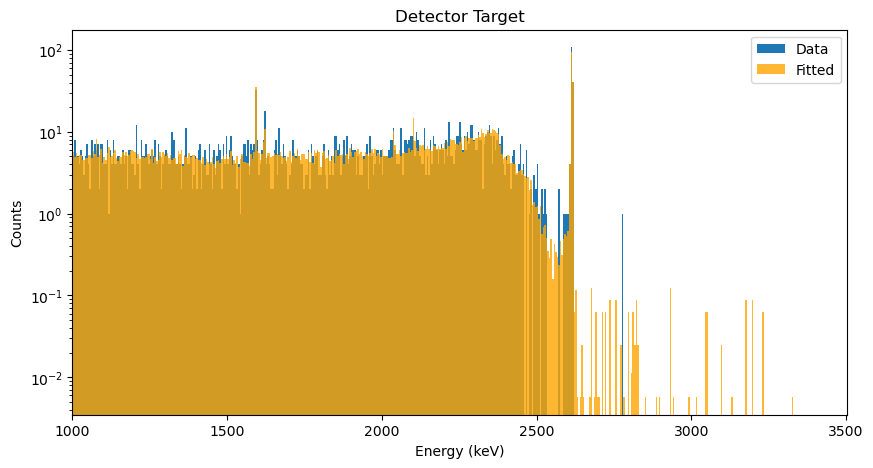

In [72]:
fitted_hist = hypothesis(result)
plt.figure(figsize=(10, 5))
plt.stairs(selected_hist_Target, bins_Target, label='Data', fill=True)
plt.stairs(fitted_hist, bins_Target, label='Fitted', fill=True, alpha=0.8, color='orange')
plt.yscale('log')
plt.xlim(energy_lower_limit, energy_upper_limit + bin_width)
plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Detector Target')


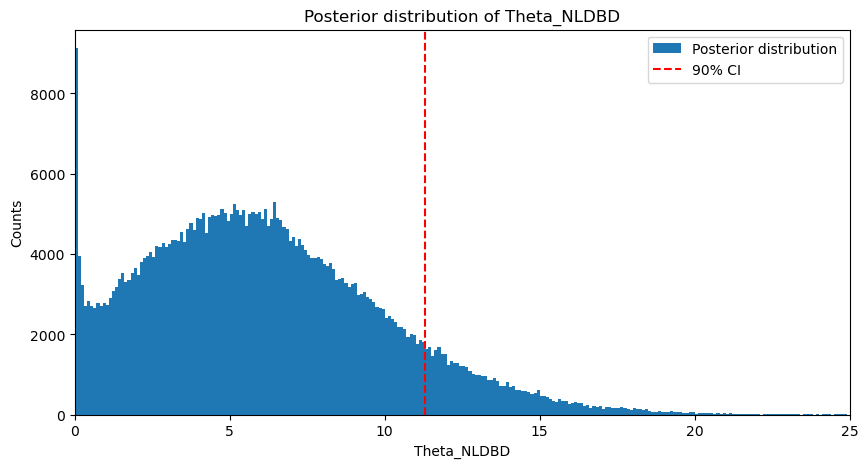

In [73]:
CI = np.percentile(flat_samples[:, 3], 90)
theta_N_hist, theta_N_bins = np.histogram(flat_samples[:, 3], bins=np.arange(0, 25, 0.1))
plt.figure(figsize=(10, 5))
plt.stairs(theta_N_hist, theta_N_bins, fill=True, label='Posterior distribution')
plt.axvline(CI, color='red', linestyle='--', label='90% CI')
plt.xlim(0, 25)
plt.xlabel('Theta_NLDBD')
plt.ylabel('Counts')
plt.title('Posterior distribution of Theta_NLDBD')
plt.legend()

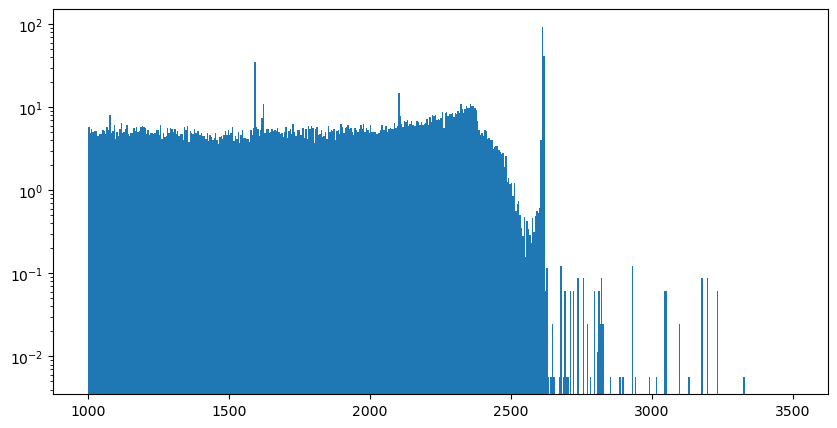

In [74]:
asimov_hist = result[0] * pdf_A + result[1] * pdf_B + result[2] * pdf_C

plt.figure(figsize=(10, 5))
plt.stairs(asimov_hist, bins_Target, fill=True, label='Asimov data')
plt.yscale('log')
plt.show()

In [75]:
# new functions for asimov data
def hypothesis_asimov(theta):
    return result[0] * pdf_A + result[1] * pdf_B + result[2] * pdf_C + theta * pdf_N

def log_likelihood_asimov(theta, target_hist):
    mu = hypothesis_asimov(theta)
    non_zero_bins = target_hist[(target_hist > 0) & (mu > 0)]
    non_zero_bins_mu = mu[(target_hist > 0) & (mu > 0)]
    zero_bins_mu = mu[~(target_hist > 0) & ~(mu > 0)]
    return np.sum(non_zero_bins * np.log(non_zero_bins_mu) - non_zero_bins_mu - non_zero_bins * np.log(non_zero_bins) + non_zero_bins) - np.sum(zero_bins_mu)
    
def log_prior_asimov(theta):
    # Use Jeffreys prior for Poisson distribution for theta_N
    prior = - np.log(theta) / 2
    return prior

def log_posterior_asimov(theta, target_hist):
    # Use the log-likelihood and log-prior to compute the log-posterior
    posterior = log_likelihood_asimov(theta, target_hist) + log_prior_asimov(theta)
    if np.any(theta < 0):
        return -np.inf
    return posterior

In [76]:
# run mcmc on the asimov dataset
ovbb = 0
n_walkers = 100
initial_theta_asimov = ovbb + 0.1 * np.random.randn(n_walkers, 1)

sampler_asimov = emcee.EnsembleSampler(n_walkers, 1, log_posterior_asimov, args=[asimov_hist])

In [77]:
sampler_asimov.run_mcmc(initial_theta_asimov, 5000, progress=True)

C:\Users\hdhoa\AppData\Local\Temp\ipykernel_19612\2984133817.py:14: RuntimeWarning: invalid value encountered in log
  prior = - np.log(theta) / 2
100%|██████████| 5000/5000 [00:11<00:00, 424.39it/s]


State([[3.77833753e-01]
 [6.14337429e+00]
 [1.12404066e+00]
 [3.70756672e-01]
 [1.37648072e-01]
 [2.28862473e+00]
 [4.75197357e-01]
 [3.46499807e-01]
 [3.70002385e-01]
 [9.85931624e-01]
 [3.17311893e+00]
 [3.31927689e-02]
 [6.70394155e-01]
 [8.88082855e-01]
 [1.87520280e+00]
 [3.75205210e-01]
 [4.43181100e+00]
 [4.29145946e-01]
 [1.43508856e-01]
 [1.99586395e+00]
 [1.90071990e+00]
 [1.83727893e+00]
 [2.29418587e+00]
 [1.10473276e+00]
 [4.13986334e+00]
 [1.46816069e-01]
 [4.08036095e+00]
 [1.98644127e-03]
 [1.44196204e+00]
 [1.62250330e-01]
 [3.90714885e+00]
 [4.04825493e-01]
 [1.15096272e+00]
 [2.94664923e+00]
 [1.05472305e-01]
 [8.09017934e+00]
 [3.45874436e-01]
 [1.98919332e+00]
 [2.72976019e-02]
 [5.58481709e+00]
 [1.27181379e-01]
 [3.48379006e+00]
 [3.05948218e-02]
 [1.11512840e+00]
 [1.72828655e+00]
 [2.20864174e-01]
 [2.78224548e+00]
 [4.19760911e-01]
 [4.13785886e+00]
 [7.75572052e-01]
 [2.33542832e+00]
 [3.06464997e-01]
 [2.59755819e-02]
 [5.44516707e-01]
 [1.44525453e+00]
 [1.

Text(0.5, 0, 'step number')

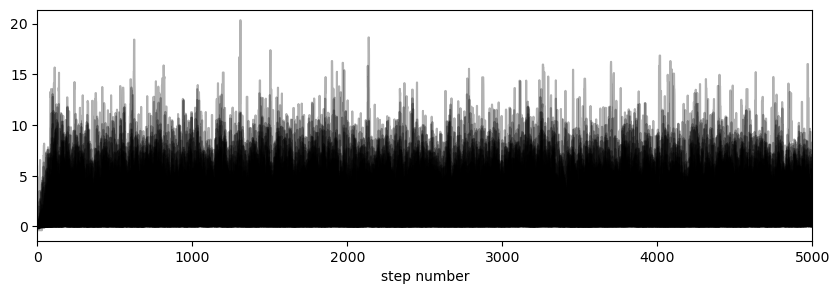

In [78]:
fig, axes = plt.subplots(1, figsize=(10, 3), sharex=True)
samples_asimov = sampler_asimov.get_chain()
labels = ["A", "B", "C", "N"]

ax = axes
ax.plot(samples_asimov[:, :, 0], "k", alpha=0.3)
ax.set_xlim(0, len(samples_asimov))
#ax.yaxis.set_label_coords(-0.1, 0.5)

axes.set_xlabel("step number")

In [79]:
sampler_asimov.get_autocorr_time()

array([44.76527417])

In [80]:
flat_samples_asimov = sampler_asimov.get_chain(discard=200, flat=True)
print(flat_samples_asimov.shape)

(480000, 1)


In [81]:
mcmc_asimov = np.percentile(flat_samples_asimov[:, 0], [16, 50, 84])
q = np.diff(mcmc_asimov)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc_asimov[1], q[0], q[1], 'N_{A}')
result_asimov = mcmc_asimov[1]
display(Math(txt))

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hdhoa\AppData\Local\Temp\ipykernel_19612\2585125136.py:3: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"


<IPython.core.display.Math object>

In [82]:
ES = np.percentile(flat_samples_asimov[:, 0], 90)  # experimental sensitivity
CI = np.percentile(flat_samples[:, 3], 90)  # 90% credible interval
print(ES)
print(CI)

4.263345127074122
11.286947938182239


(0.0, 25.0)

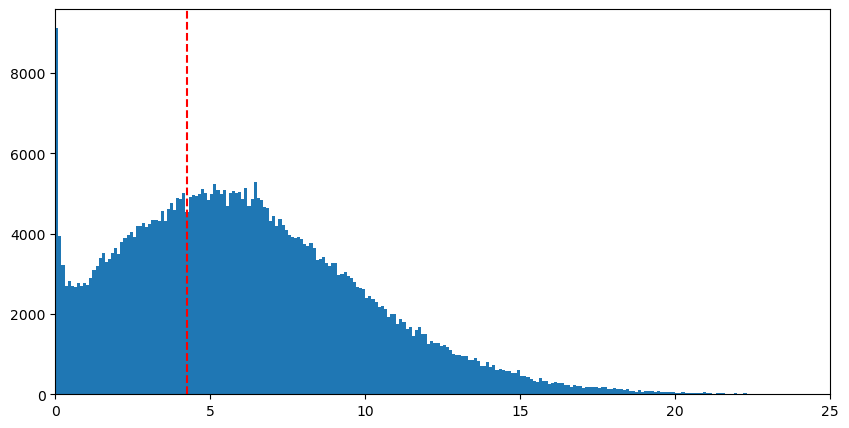

In [83]:
theta_N_hist_asimov, theta_N_bins_asimov = np.histogram(flat_samples_asimov, bins=np.arange(0, 25, 0.1))
plt.figure(figsize=(10, 5))
plt.stairs(theta_N_hist, theta_N_bins, fill=True)
plt.axvline(ES, color='red', linestyle='--', label='90% CI')
plt.xlim(0, 25)

In [84]:
TPR = metrics(selected_threshold)[0]
m = result[3] / TPR
m

np.float64(6.509197621508367)

"ES" is the experimental sensitivity, or 90% median sensitivity; "CI" is the Bayes 90% credible interval, or experimental confidence limit. Since our experimental confidence limit is greater than the 90% median sensitivity, we have overfluctuation, meaning we've obtained a stronger result (in practice) than the minimum detectable level [from the toy Asimov data, assuming no $0 \nu \beta \beta$ decay events]; given that some $m$ number of $0 \nu \beta \beta$ decay events have been artificially injected, this makes sense (and is expected, even).